In [1]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User
target_user = "realdonaldtrump"

# Create array to record all date-times of tweets
tweet_times = []

# Create a counter for viewing every 100 tweets
counter = 0

# Loop through 500 tweets
for x in range(1, 26):
    
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
        
        counter += 1
        
        # Print tweets for preview
        if counter % 100 == 0:
            print(tweet["created_at"])

# Confirm tweet counts
len(tweet_times)

Sat Mar 10 20:02:02 +0000 2018
Fri Feb 23 13:07:07 +0000 2018
Wed Feb 07 18:01:05 +0000 2018
Thu Jan 18 01:11:26 +0000 2018
Sat Jan 06 04:19:10 +0000 2018


500

In [3]:
# Convert all tweet times into datetime objects
tweet_time_objects = []

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(tweet_times[x])
        print(tweet_datetime)

Thu Mar 29 11:57:38 +0000 2018
2018-03-29 11:57:38+00:00
Sat Mar 10 18:38:17 +0000 2018
2018-03-10 18:38:17+00:00
Fri Feb 23 13:01:09 +0000 2018
2018-02-23 13:01:09+00:00
Wed Feb 07 16:10:00 +0000 2018
2018-02-07 16:10:00+00:00
Thu Jan 18 01:05:46 +0000 2018
2018-01-18 01:05:46+00:00


In [4]:
# Calculate the time between tweets
time_in_between = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    time_in_between.append(hrs_apart)

# Hours Between Tweets
print(f"Avg. Hours Between Tweets: {np.mean(time_in_between)}")

Avg. Hours Between Tweets: 3.6225272767757737


In [5]:
time_in_between[:10]

[14.428888888888888,
 0.012777777777777779,
 1.735,
 3.466666666666667,
 0.005,
 0.06944444444444445,
 5.9688888888888885,
 0.18555555555555556,
 0.21166666666666667,
 15.291666666666666]

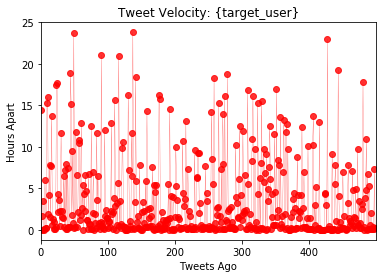

In [6]:
# Plot Time Between Tweets
plt.plot(range(len(time_in_between)), time_in_between, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")
plt.xlim([0, len(time_in_between)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Tweet Velocity: {target_user}")
plt.show()